<a href="https://colab.research.google.com/github/VedantMalgundkar/Simple-linear-regression-with-custom-gradient-descent-/blob/main/Simple_linear_regression_with_custom_gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import plotly.express as px
import plotly.graph_objects as go
import os

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random
from IPython.display import Image

In [3]:
np.random.seed(0)
x = np.random.randn(1000,1).reshape(1,-1)[0]
y = 3 * x + 5 + np.random.normal(10,1.5,1000)

In [4]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 0)

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = np.array(scaler.fit_transform(x_train.reshape(-1,1)))
x_test = np.array(scaler.fit_transform(x_test.reshape(-1,1)))

## Gradients descent maths

Lets consider a hypothesized equation of line that will represent best fit line to our data.
### $\hat{y} = mx + c$
        
### $\hspace{1cm}\hat{y} : \hspace{2mm}estimated \hspace{1mm}output$
        
### $\hspace{1cm}m    : \hspace{2mm}slope$

### $\hspace{1cm}c    : \hspace{2mm}y-intercept$

<br>


A cost function is a mathematical function that is minimized to get the optimal values of slope ‘m’ and y-intercept ‘c’. <br>The cost function associated with linear regression is called the mean squared error.

<br>


##### $Cost function :$
##### $J(m,c) = \frac{1}{2n}\sum(y_i-\hat{y_i})^2$
##### $\hspace{18mm}=\frac{1}{2n}\sum(y_i- mx_i - c)^2$

<br>


Mathematically, the Gradient Descent works by calculating the partial derivative  to the current value of ‘m’ and ‘c’. <br>At each step, the value of both ‘m’ and ‘c’ get updated simultaneously. <br>The values will keep on updating until we reach the value of ‘m’ and ‘c’ for which the cost function reaches the minimum value.<br>
<br>
The learning rate ($α$) is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.

<br>
$\normalsize \hspace{5mm} m_{new} = m_{old} - \alpha \times \frac{\partial}{\partial m} J(m,c) ..(i)$


$\normalsize \hspace{5mm} c_{new} = c_{old} - \alpha \times \frac{\partial}{\partial c} J(m,c) ..(ii)$

<br>

* $\normalsize Partial \hspace{1mm}derivative \hspace{1mm} calculation.$

<br>

$\normalsize \hspace{5mm} \frac{\partial}{\partial m} J(m,c) = \frac{\partial}{\partial m} \frac{1}{2n}\sum(y_i-\hat{y_i})^2$  
<br>
$\normalsize \hspace{5mm} \frac{\partial}{\partial c} J(m,c) = \frac{\partial}{\partial c} \frac{1}{2n}\sum(y_i-\hat{y_i})^2$

<br>


* $\normalsize Consider\hspace{1mm} partial\hspace{1mm} derivative\hspace{1mm} of \hspace{1mm}one \hspace{1mm}training \hspace{1mm}example.$

<br>


$\normalsize \hspace{5mm}\frac{\partial}{\partial m} J(m,c)=\frac{\partial}{\partial m} \frac{1}{2n}(y-\hat{y})^2$

$\normalsize \hspace{1cm}={_2}\frac{1}{2n}(y-\hat{y}) \times \frac{\partial}{\partial m} (y-\hat{y}) $

$\normalsize \hspace{1cm}=\frac{1}{n}(y-\hat{y}) \times \frac{\partial}{\partial m} (y-mx - c) $

$\normalsize \hspace{1cm}=\frac{1}{n}(y-\hat{y})\times {-x}$

***
$\normalsize \hspace{5mm}\frac{\partial}{\partial m} J(m,c) =\frac{-x}{n}(y-\hat{y})....(iii)$
***

<br>


$\normalsize \hspace{5mm}\frac{\partial}{\partial c} J(m,c)=\frac{\partial}{\partial c} \frac{1}{2n}(y-\hat{y})^2$

$\normalsize \hspace{1cm}={_2}\frac{1}{2n}(y-\hat{y}) \times \frac{\partial}{\partial c} (y-\hat{y}) $

$\normalsize \hspace{1cm}=\frac{1}{n}(y-\hat{y}) \times \frac{\partial}{\partial c} (y-mx - c) $

$\normalsize \hspace{1cm}=\frac{1}{n}(y-\hat{y})\times {-1}$

***
$\normalsize \hspace{5mm}\frac{\partial}{\partial c} J(m,c)=\frac{-1}{n}(y-\hat{y})....(iv)$
***

<br>


* $\normalsize Substituting\hspace{1mm}\hspace{1mm} (iii)\hspace{1mm} and\hspace{1mm} (iv)\hspace{1mm} in \hspace{1mm}equation\hspace{1mm} (i) \hspace{1mm}and \hspace{1mm}(ii)\hspace{1mm} respectively.$

* $\normalsize Derivative\hspace{1mm}\hspace{1mm} of \hspace{1mm}sum \hspace{1mm}is \hspace{1mm}sum \hspace{1mm}of \hspace{1mm}derivative.$

<br>

$\normalsize m_{new} = m_{old} - \alpha \times \frac{\partial}{\partial m} J(m,c)$

$\normalsize m_{new} = m_{old} - \alpha \times \frac{-x}{n}(y-\hat{y})$

***
$\small m_{new} = m_{old} - \alpha \times \frac{1}{n}\sum(y_i-\hat{y_i})\times {-x_i}$
***

<br>


$\normalsize c_{new} = c_{old} - \alpha \times \frac{\partial}{\partial c} J(m,c)$

$\normalsize c_{new} = c_{old} - \alpha \times \frac{-1}{n}(y-\hat{y})$

***
$\normalsize c_{new} = c_{old} - \alpha \times \frac{1}{n}\sum(y_i-\hat{y_i})\times {-1} $
***

> We got final equation to update the parameters (m,c) of the hypothesized straight line.

## Creating linear regression class

Gradient descent (GD) is an iterative first-order optimisation algorithm used to find a local minimum/maximum of a given function.
<br>This method is commonly used in machine learning (ML) and deep learning(DL) to minimise a cost/loss function (e.g. in a linear regression).

In [6]:
class LinReg:
    def __init__(self):
        self.history = np.array([])
        self.m = 0
        self.c = 0


    def GD(self,x,y,m,c,epochs,learning_rate):
        dldm = 0.0
        dldc = 0.0

        n = x.shape[0]

        dldm = np.sum(-x * (y-(m * x + c))) # .....(iii) GD maths cell
        dldc = np.sum(-1 * (y-(m * x + c))) # .....(iv)  GD maths cell

        m_new = m - (learning_rate * (1/n) * dldm) # final equation
        c_new = c - (learning_rate * (1/n) * dldc) # final equation

        return m_new,c_new

    def fit(self,x ,y ,epochs ,learning_rate ,batch_size = None, method = 'SGD'):
        m = 0.0
        c = 0.0

        if self.history.size != 0:
            self.history = np.delete(self.history,np.arange(self.history.size))

        if x.ndim >1:
            x = np.squeeze(x)

        if batch_size is None and method == 'GD':

            for i in range(epochs):
                m ,c = self.GD(x,y,m,c,epochs,learning_rate)
                yhat = m * x + c
                loss = np.divide(np.sum((y-yhat)**2),2*x.shape[0])

                self.history = np.append(self.history, m)
                self.history = np.append(self.history, c)
                self.history = np.append(self.history, loss)

            self.m = self.history[-3]
            self.c = self.history[-2]



        elif batch_size is not None and method == 'SGD':

            for i in range(epochs):
                for i in range(int(len(x)/batch_size)):
                    ind = random.sample(range(len(x)),batch_size)

                    x = x[ind]
                    y = y[ind]

                    m ,c =self.GD(x,y,m,c,epochs,learning_rate)
                    yhat = m * x + c
                    loss = np.divide(np.sum((y-yhat)**2),2*x.shape[0])

                    self.history = np.append(self.history, m)
                    self.history = np.append(self.history, c)
                    self.history = np.append(self.history, loss)

            self.m = self.history[-3]
            self.c = self.history[-2]

        elif batch_size is not None and method == 'GD':
            raise TypeError("fit() don't require keyword argument : 'batch_size' when method is GD.")

        elif batch_size is None and method == 'SGD':
            raise TypeError("fit() missing 1 required keyword argument : 'batch_size' when method is 'SGD'.")


    def animate_fit(self,x,y,x_label='X_train',y_label='Y_train',Scatter_pt_color = 'black', reg_line_color='blue',info_color = "green"):

      history_data = self.history.reshape(-1,3)

      Epoch_arr = np.arange(1,len(history_data)+1).reshape(-1,1)

      history_arr = np.concatenate([Epoch_arr,history_data],1)

      if os.path.exists('/content/images'):
        !rm -rf images
        !rm -rf bestfit.gif
        !mkdir images
      else:
        !mkdir images

      for Epoch in range(len(history_arr)):

        m = history_arr[Epoch][1]
        c = history_arr[Epoch][2]
        loss = history_arr[Epoch][3]

        # calulate yhat for ith epoch
        yhat = m * x + c

        plt.title('Updating slope and y_intercept using gradient descent to find best fit line')

        x_axis_margin = np.mean(abs(np.diff(x.flatten())))/2
        y_axis_margin = np.mean(abs(np.diff(y.flatten())))/2

        plt.xlim(x.min() - x_axis_margin , x.max() + x_axis_margin)
        plt.ylim(y.min() - y_axis_margin , y.max() + y_axis_margin)

        fig = plt.gcf()
        fig.set_size_inches(18-3, 10-3)

        plt.scatter(x, y, color=Scatter_pt_color)
        plt.xlabel(x_label)
        plt.ylabel(y_label)

        if Epoch in range(1, len(history_arr), int(len(history_arr)*0.03)):

          plt.plot(x,yhat,color = reg_line_color)

          fig.text(0.15, 0.82,
                f'Epoch                                 : {Epoch}',
                style = 'italic',
                fontsize = 16,
                color = info_color)

          fig.text(0.15, 0.77,
                f'Updated slope                   : {m:.3f}',
                style = 'italic',
                fontsize = 16,
                color = info_color)

          fig.text(0.15, 0.72,
                f'Updated y-intercept          : {c:.3f}',
                style = 'italic',
                fontsize = 16,
                color = info_color)

          fig.text(0.15, 0.67,
                f'Loss                                 : {loss:.3f}',
                style = 'italic',
                fontsize = 16,
                color = info_color)

          plt.savefig(f'images/Epoch : {Epoch:003}',dpi =100 , facecolor = 'white')
          plt.close()
      plt.close()
      !convert -delay 10 images/* bestfit.gif # large the number "10" slower the gif.

      return Image('/content/bestfit.gif')

    def predict(self,x):
        if x.ndim >1:
            x = np.squeeze(x)
        return  self.m * x + self.c

## Model fitting

In [7]:
model = LinReg()

In [8]:
model.fit(x_train ,y_train ,epochs=900 ,learning_rate=0.01 ,method='GD') # Gradient descent.
# model.fit(x_train ,y_train ,batch_size = 13,epochs=1000 ,learning_rate=0.01 ,method='SGD') # Stochastic gradient descent.

In [9]:
model.m

2.9875341400054367

In [10]:
model.c

14.911722932642977

In [11]:
!apt install imagemagick # install imagemagick before running "animate_fit".

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
imagemagick is already the newest version (8:6.9.11.60+dfsg-1.3ubuntu0.22.04.3).
0 upgraded, 0 newly installed, 0 to remove and 17 not upgraded.


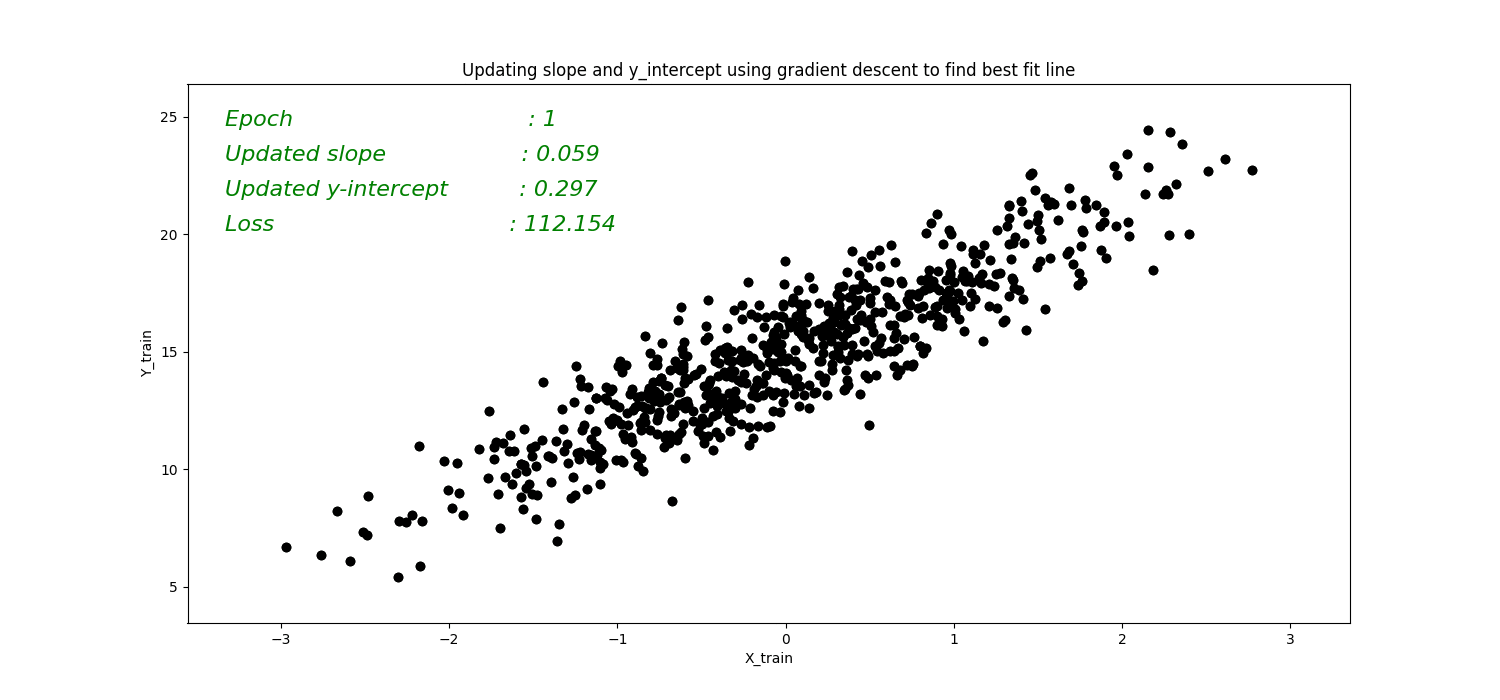

In [12]:
model.animate_fit(x_train,y_train)

## Model history of data fitting

"model.history" is numpy array which consist of history of slopes, y-intercepts and losses from each epoch.

In [13]:
Epoch_arr = np.arange(1,len(model.history.reshape(-1,3))+1).reshape(-1,1)

In [14]:
df = pd.DataFrame(np.concatenate([Epoch_arr,model.history.reshape(-1,3)],1),
                  columns = ['Epoch','Slope','Y-intercept','Loss'])

df.tail()

,Epoch,Slope,Y-intercept,Loss
895,896.0,2.987520,14.911651,1.042419
896,897.0,2.987523,14.911669,1.042419
897,898.0,2.987527,14.911687,1.042419
898,899.0,2.987531,14.911705,1.042419
899,900.0,2.987534,14.911723,1.042419


Above dataframe shows all update history of slope y-intercept and respective loss of that epoch.<br>
eg. in epoch 900 slope was 2.98.. and y-intercept was 14.91... and loss was 1.04...

## 3D plot of Gradient descent visualization (data preparation).

In [15]:
def z_function(m,c):

    loss_arr = np.array([])
    data_types = [int,float,np.int64,np.float64]

    if type(m) in data_types and type(c) in data_types:
        loss = np.divide(np.sum((y - (m * x+ c)) ** 2), 2 * x.shape[0])
        return loss

    else:
        for rows in range(m.shape[0]):
            for ele in range(len(m[rows])):
                # Calculating loass for each possible values in X_mesh and Y_mesh
                loss = np.divide(np.sum((y- (m[rows][ele]*x+ c[rows][ele]))** 2), 2 * x.shape[0])
                loss_arr = np.append(loss_arr, loss)

        return loss_arr.reshape(-1,len(m))

In [16]:
x_min_dis = df['Slope'].min()*668.3694594514558

x_min = np.round(df['Slope'].min()-x_min_dis)

x_max_dis = df['Slope'].max()*9.041726251183663

x_max = np.round(df['Slope'].max()+x_max_dis)

In [17]:
y_min_dis = df['Y-intercept'].min()*68.05342237852884

y_min = np.round(df['Slope'].min()-y_min_dis)

y_max_dis = df['Y-intercept'].max()*1.01183995541706

y_max = np.round(df['Y-intercept'].max()+y_max_dis)

In [18]:
x_min,x_max,y_min,y_max

(-20.0, 30.0, -10.0, 30.0)

Preparing data for 3d surface






In [19]:
X = np.linspace(x_min,x_max,300) # x axis data for 3D plot
Y = np.linspace(y_min,y_max,300) # y axis data dor 3D plot

X_mesh,Y_mesh = np.meshgrid(X,Y) # mesh grid of x and y axis

Z = z_function(X_mesh,Y_mesh) # z axis data

working of "z_function" :

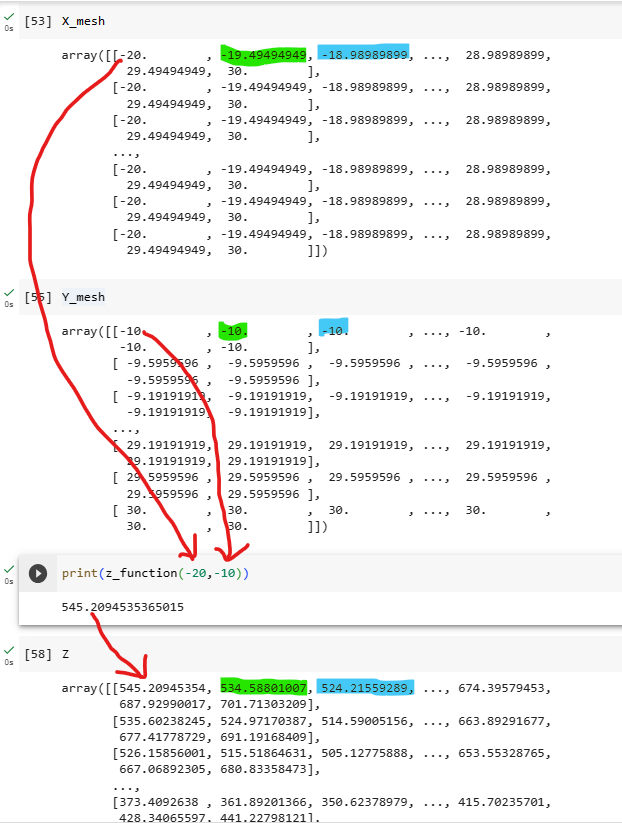

## Output : 3D plot of Gradient descent visualization.

In [20]:
fig = go.Figure(data=go.Surface(z = Z,
                                x = X,
                                y = Y,
                                colorscale ='YlGnBu'))
# add a countour plot
fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="limegreen", project_z=True))

fig.add_trace(go.Scatter3d(x=df['Slope'].values , y=df['Y-intercept'].values , z=df['Loss'].values,
                           customdata=df.values,
                           hovertemplate='Epoch           : %{customdata[0]}<br>'+
                                          'Slope           : %{customdata[1]}<br>'+
                                          'Y-intercept   : %{customdata[2]}<br>'+
                                           'Loss             : %{customdata[3]}<br>',
                           mode ='markers',
                           marker =dict(size=9,color = df['Loss'].values ,colorscale='Brwnyl'),
                           name='Gradient descent path'
                           )
              )

fig.update_layout(title='Gradient descent trace on MSE loss surface',
                  scene=dict(xaxis=dict(title='Slope'),
                              yaxis=dict(title='Y-intercept'),
                              zaxis=dict(title='Loss')
                             ),
                  autosize=False,
                  width=800,
                  height=950,
                  )

# # Show the plot
fig.show()

In [21]:
# COLOR SELECTION
# fig = px.colors.sequential.swatches_continuous()
# fig.show()

# Model inferences

In [22]:
y_preds = model.predict(x_test)

In [23]:
pd.DataFrame(np.concatenate([y_test.reshape(-1,1),
                np.round(y_preds,2).reshape(-1,1),
                (np.round(abs(y_test-y_preds),2)).reshape(-1,1)],axis = 1),columns = ['Actual','Predicted','Difference'])

,Actual,Predicted,Difference
0,15.237176,15.85,0.62
1,14.914210,15.16,0.25
2,14.040529,13.80,0.24
3,15.079553,14.22,0.86
4,6.567477,8.83,2.26
...,...,...,...
295,10.932325,10.12,0.81
296,9.844315,11.40,1.55
297,11.289134,12.07,0.78
298,12.839965,13.96,1.12


In [24]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_preds))

2.2266044515395333


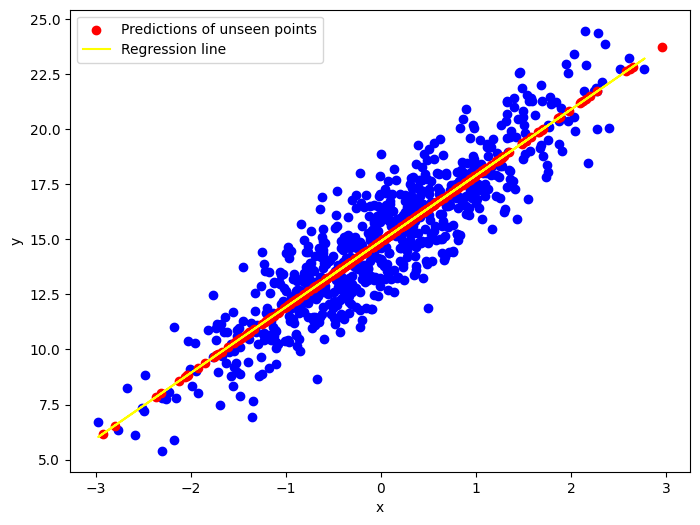

In [25]:
plt.figure(figsize=(10-2,8-2))
plt.scatter(x_train,y_train,color='blue')
plt.scatter(x_test,model.predict(x_test),color='red',label="Predictions of unseen points")
plt.plot(x_train,model.predict(x_train),color='yellow',label="Regression line")

plt.xlabel('x')
plt.ylabel('y')
plt.legend()